In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = [
    {"text": "I absolutely loved the new Batman movie!", "label": "positive"},
    {"text": "This product is terrible and broke within days.", "label": "negative"},
    {"text": "It was an okay experience, nothing special.", "label": "neutral"},
    {"text": "The service was outstanding and the staff were friendly.", "label": "positive"},
    {"text": "I wouldn't recommend this to anyone.", "label": "negative"},
    {"text": "Not bad, but could have been better.", "label": "neutral"},
    {"text": "I'm really happy with the results!", "label": "positive"},
    {"text": "Completely disappointed. Waste of money.", "label": "negative"},
    {"text": "It works just fine.", "label": "neutral"},
    {"text": "The concert was mind-blowing!", "label": "positive"},
    {"text": "Worst customer service ever.", "label": "negative"},
    {"text": "It's acceptable, I guess.", "label": "neutral"},
    {"text": "Loved the way the story unfolded!", "label": "positive"},
    {"text": "It made me feel sick.", "label": "negative"},
    {"text": "The interface is average.", "label": "neutral"},
    {"text": "Fantastic design and intuitive UI!", "label": "positive"},
    {"text": "This is the worst app I've ever used.", "label": "negative"},
    {"text": "Does the job decently.", "label": "neutral"},
    {"text": "Great value for the price!", "label": "positive"},
    {"text": "Awful quality and too expensive.", "label": "negative"},
    {"text": "I'm not sure how I feel about it.", "label": "neutral"},
    {"text": "Absolutely amazing experience!", "label": "positive"},
    {"text": "Regret buying this item.", "label": "negative"},
    {"text": "It's neither good nor bad.", "label": "neutral"},
    {"text": "Super helpful team and fast resolution.", "label": "positive"},
    {"text": "Too many bugs and crashes.", "label": "negative"},
    {"text": "It's okay for temporary use.", "label": "neutral"},
    {"text": "They exceeded my expectations!", "label": "positive"},
    {"text": "Very rude and unprofessional.", "label": "negative"},
    {"text": "Mediocre performance.", "label": "neutral"},
    {"text": "I’ll definitely come back again!", "label": "positive"},
    {"text": "I'm never using this again.", "label": "negative"},
    {"text": "Fairly standard quality.", "label": "neutral"},
    {"text": "Top-notch service all the way.", "label": "positive"},
    {"text": "Did not live up to the hype.", "label": "negative"},
    {"text": "Kind of forgettable.", "label": "neutral"},
    {"text": "Best purchase I made this year!", "label": "positive"},
    {"text": "I want my money back.", "label": "negative"},
    {"text": "Just average.", "label": "neutral"},
    {"text": "Everything was perfect.", "label": "positive"},
    {"text": "Total letdown.", "label": "negative"},
    {"text": "Mixed feelings.", "label": "neutral"},
    {"text": "Incredible quality and support!", "label": "positive"},
    {"text": "So frustrating to use.", "label": "negative"},
    {"text": "It's fine I suppose.", "label": "neutral"},
    {"text": "Exceeded all my hopes.", "label": "positive"},
    {"text": "Wouldn’t wish this on my worst enemy.", "label": "negative"},
    {"text": "Neither impressed nor disappointed.", "label": "neutral"},
    {"text": "Highly recommend it to everyone!", "label": "positive"},
    {"text": "Fails to deliver on promises.", "label": "negative"},
    {"text": "Serviceable, but not special.", "label": "neutral"},
    {"text": "Wonderful experience from start to end!", "label": "positive"},
    {"text": "Horrible service and rude employees.", "label": "negative"},
    {"text": "Just your average experience.", "label": "neutral"},
    {"text": "Perfectly executed event!", "label": "positive"},
    {"text": "It didn’t work at all.", "label": "negative"},
    {"text": "A neutral choice.", "label": "neutral"},
    {"text": "Unbelievably good!", "label": "positive"},
    {"text": "Defective and not as described.", "label": "negative"},
    {"text": "I feel neutral about it.", "label": "neutral"},
    {"text": "10/10 would use again.", "label": "positive"},
    {"text": "Totally dissatisfied.", "label": "negative"},
    {"text": "Can’t complain.", "label": "neutral"},
    {"text": "Absolutely love it!", "label": "positive"},
    {"text": "Extremely poor functionality.", "label": "negative"},
    {"text": "Nothing out of the ordinary.", "label": "neutral"},
    {"text": "Truly exceptional product.", "label": "positive"},
    {"text": "Broke after one use.", "label": "negative"},
    {"text": "A meh experience.", "label": "neutral"},
    {"text": "Superb customer experience!", "label": "positive"},
    {"text": "Product arrived damaged.", "label": "negative"},
    {"text": "Reasonable quality.", "label": "neutral"},
    {"text": "Loved every bit of it!", "label": "positive"},
    {"text": "Wouldn’t buy again.", "label": "negative"},
    {"text": "Just average quality.", "label": "neutral"},
    {"text": "Delightful and efficient!", "label": "positive"},
    {"text": "Completely useless.", "label": "negative"},
    {"text": "It’s okay I guess.", "label": "neutral"},
    {"text": "Highly satisfied with the product.", "label": "positive"},
    {"text": "Terribly designed UI.", "label": "negative"},
    {"text": "Basic and usable.", "label": "neutral"},
    {"text": "Smooth and professional!", "label": "positive"},
    {"text": "It crashed repeatedly.", "label": "negative"},
    {"text": "Functional but uninspiring.", "label": "neutral"},
    {"text": "Marvelous execution.", "label": "positive"},
    {"text": "Pathetic experience.", "label": "negative"},
    {"text": "So-so product.", "label": "neutral"},
    {"text": "Blown away by how good it was!", "label": "positive"},
    {"text": "Very dissatisfied and annoyed.", "label": "negative"},
    {"text": "Meh. It’s fine.", "label": "neutral"},
    {"text": "Would give it more stars if I could!", "label": "positive"},
    {"text": "Terrible design flaws.", "label": "negative"},
    {"text": "Somewhat helpful.", "label": "neutral"},
    {"text": "Fantastic experience overall!", "label": "positive"},
    {"text": "One of the worst things I’ve used.", "label": "negative"},
    {"text": "Totally average in every way.", "label": "neutral"},
    {"text": "Impressed by the quality!", "label": "positive"},
    {"text": "Nothing worked as expected.", "label": "negative"},
    {"text": "It's okay for now.", "label": "neutral"},
]



#Step1-Preprocess text data

In [26]:
!pip install nltk

In [28]:
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# Initialize
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [41]:
# Preprocessing
def preprocess(text):
    lemmatized = []
    text = text.lower()
  #  print(text)
    tokens = word_tokenize(text)
    #print("token=",tokens)
    for t in tokens:
      if t.isalpha() and t not in stop_words:# keep only tokens that are alphabetic
        tokens.remove(t)
    #tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    for t in tokens:
      lemmatized.append(lemmatizer.lemmatize(t))
    return " ".join(lemmatized)


In [42]:
# Apply preprocessing
texts = [preprocess(item["text"]) for item in data]
labels = [item["label"] for item in data]

In [43]:
print(texts)
print(labels)

['i loved the batman !', 'this is and within .', 'it wa an experience , special .', 'the wa and the were .', "i n't this to .", 'not , but have been .', "i 'm happy with the !", 'disappointed . of .', 'it just .', 'the wa mind-blowing !', 'customer ever .', "it 's , i .", 'the the unfolded !', 'it me sick .', 'the is .', 'design and ui !', "this is the app i 've used .", 'doe the decently .', 'value for the !', 'quality and too .', "i 'm not how i about it .", 'amazing !', 'buying this .', "it 's good nor .", 'helpful and resolution .', 'too bug and .', "it 's for use .", 'they my !', 'very and .', 'performance .', 'i ’ ll come again !', "i 'm using this again .", 'standard .', 'top-notch all the .', 'did not up to the .', 'of .', 'purchase i this !', 'i my back .', 'just .', 'wa .', 'letdown .', 'feeling .', 'quality and !', 'so to .', "it 's i .", 'all my .', 'wouldn ’ t this on my enemy .', 'impressed nor .', 'recommend it to !', 'to on .', ', but not .', 'experience from to !', 'se

In [44]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(texts)

#Step2:Build a text classification model using the preprocessed features.

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [46]:
# Classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'negative', 'negative', 'positive', 'negative', 'positive'],
      dtype='<U8')

In [49]:
# Evaluation
#Accuracy is a performance metric that tells you how many predictions your model got right, compared to the total number of predictions.
#Accuracy= Total Samples/True Positives+True Negatives
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.30      0.46        10
     neutral       0.75      0.60      0.67         5
    positive       0.31      0.80      0.44         5

    accuracy                           0.50        20
   macro avg       0.69      0.57      0.52        20
weighted avg       0.76      0.50      0.51        20



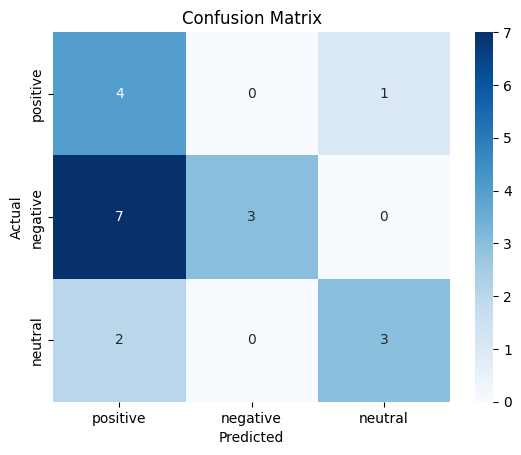

In [48]:
# Confusion matrix-compares predicted and actual values to evaluate performance of the model
conf_matrix = confusion_matrix(y_test, y_pred, labels=["positive", "negative", "neutral"])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["positive", "negative", "neutral"],
            yticklabels=["positive", "negative", "neutral"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()